# Model Agnostic Analaysis

## Introduction

In this tutorial model agnostic analysis means writing your notebook so that it can easily be used with any CF compliant data source.

## What are the CF Conventions?

From [CF Metadata conventions](https://cfconventions.org) 

> The CF metadata conventions are designed to promote the processing and sharing of files created with the NetCDF API. The conventions define metadata that provide a definitive description of what the data in each variable represents, and the spatial and temporal properties of the data. This enables users of data from different sources to decide which quantities are comparable, and facilitates building applications with powerful extraction, regridding, and display capabilities. The CF convention includes a standard name table, which defines strings that identify physical quantities.

In most cases the model output data accessed through the COSIMA Cookbook complies with some version of the CF conventions, enough to be usable for model agnostic analysis.

## How is this achieved?

Use modules that enable this, e.g. cf-xarray

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cf_xarray as cfxr

cf_xarray works best when xarray keeps attributes by default.

In [3]:
xr.set_options(keep_attrs=True);

These modules are more optional:

In [27]:
import cmocean as cm                              # Nice colormaps
import cartopy.crs as ccrs                        # For making maps.
import cartopy.feature as cft                     # For adding features to maps

You will need to nominate a database from which to load your data. Unless there is a pressing need, it is best to connect to the default database:

In [4]:
session = cc.database.create_session()

In [5]:
expt='01deg_jra55v140_iaf'

In [6]:
aice_m = cc.querying.getvar(expt,'aice_m', session, n=12)

In [7]:
aice_m

<xarray.DataArray 'aice_m' (time: 12, nj: 2700, ni: 3600)>
dask.array<concatenate, shape=(12, 2700, 3600), dtype=float32, chunksize=(1, 675, 900), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-02-01 1958-03-01 ... 1959-01-01
    TLON     (nj, ni) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-06-09
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Source code: https://github.com/COSIMA/access-om2 License...

In [9]:
aice_m.cf

Coordinates:
- CF Axes:   X, Y, Z, T: n/a

- CF Coordinates:   longitude: ['TLON']
                    latitude: ['TLAT']
                    vertical, time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

In [24]:
aice_m.cf['longitude']

<xarray.DataArray 'TLON' (nj: 2700, ni: 3600)>
dask.array<where, shape=(2700, 3600), dtype=float32, chunksize=(675, 900), chunktype=numpy.ndarray>
Dimensions without coordinates: nj, ni
Attributes:
    long_name:  T grid center longitude
    units:      degrees_east

In [16]:
sst = cc.querying.getvar(expt,'surface_salt', session, frequency='1 monthly', n=12)

In [17]:
sst.cf

Coordinates:
- CF Axes: * X: ['xt_ocean']
           * Y: ['yt_ocean']
           * T: ['time']
             Z: n/a

- CF Coordinates: * longitude: ['xt_ocean']
                  * latitude: ['yt_ocean']
                  * time: ['time']
                    vertical: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

In [18]:
sst.cf['X']

<xarray.DataArray 'xt_ocean' (xt_ocean: 3600)>
array([-279.95, -279.85, -279.75, ...,   79.75,   79.85,   79.95])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
Attributes:
    long_name:       tcell longitude
    units:           degrees_E
    cartesian_axis:  X

In [20]:
sst.cf['longitude']

<xarray.DataArray 'xt_ocean' (xt_ocean: 3600)>
array([-279.95, -279.85, -279.75, ...,   79.75,   79.85,   79.95])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
Attributes:
    long_name:       tcell longitude
    units:           degrees_E
    cartesian_axis:  X

In [48]:
experiment = '025deg_jra55v13_iaf_gmredi6'
variable = 'surface_temp'
SST = cc.querying.getvar(experiment, variable, session, frequency='1 monthly', n=12)

In [49]:
SST_time_mean = SST.mean('time') - 273.15
SST_time_mean

<xarray.DataArray 'surface_temp' (yt_ocean: 1080, xt_ocean: 1440)>
dask.array<sub, shape=(1080, 1440), dtype=float32, chunksize=(540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
Attributes:
    long_name:      Conservative temperature
    units:          deg_C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_i...

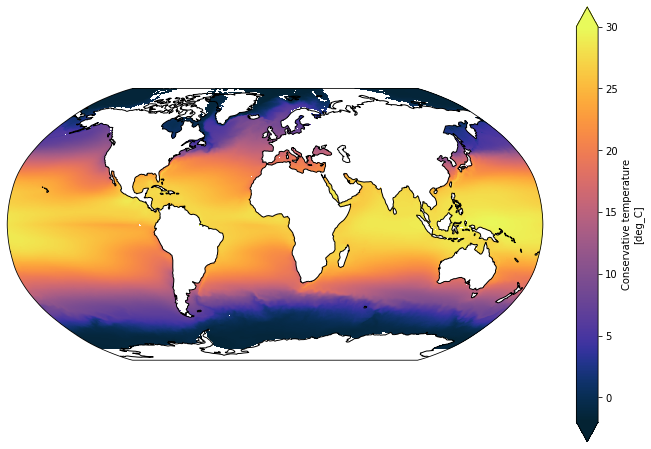

In [50]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

SST_time_mean.plot(ax=ax,
         x='xt_ocean', y='yt_ocean', 
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=30, extend='both',
         cmap=cm.cm.thermal)

ax.coastlines();

In [51]:
SST_time_mean = SST.mean(SST.cf['time'].name) - 273.15
SST_time_mean

<xarray.DataArray 'surface_temp' (yt_ocean: 1080, xt_ocean: 1440)>
dask.array<sub, shape=(1080, 1440), dtype=float32, chunksize=(540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
Attributes:
    long_name:      Conservative temperature
    units:          deg_C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_i...

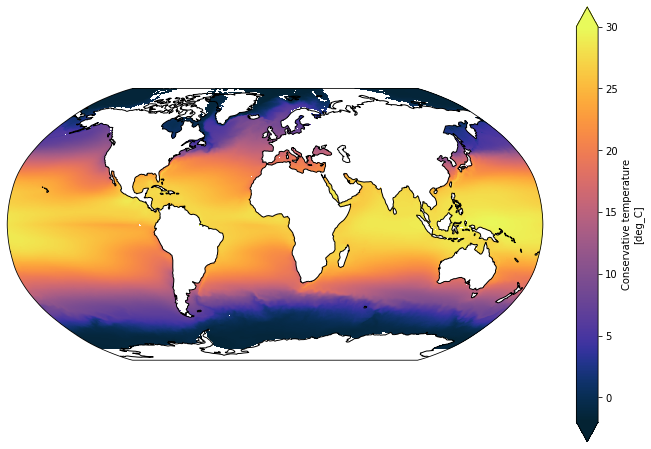

In [52]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

SST_time_mean.plot(ax=ax,
         x=SST_time_mean.cf['longitude'].name, y=SST_time_mean.cf['latitude'].name, 
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=30, extend='both',
         cmap=cm.cm.thermal)

ax.coastlines();

In [53]:
variable = 'Tsfc_m'
ice_temp_surface = cc.querying.getvar(experiment, variable, session, frequency='1 monthly', n=12)

In [54]:
ice_temp_surface

<xarray.DataArray 'Tsfc_m' (time: 12, nj: 1080, ni: 1440)>
dask.array<concatenate, shape=(12, 1080, 1440), dtype=float32, chunksize=(1, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-02-01 1958-03-01 ... 1959-01-01
    TLON     (nj, ni) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
Dimensions without coordinates: nj, ni
Attributes:
    units:          C
    long_name:      snow/ice surface temperature
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_i...

In [55]:
ice_temp_surface_mean = ice_temp_surface.mean(SST.cf['time'].name)

KeyError: "Cannot use a list of keys with DataArrays. Expected a single string. Received ['longitude'] instead."

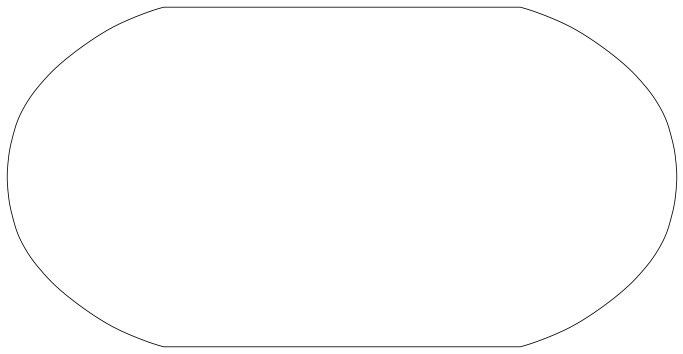

In [60]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

ice_temp_surface_mean.plot(ax=ax,
         x=ice_temp_surface_mean.cf[['longitude']].name, y=ice_temp_surface_mean.cf[['latitude']].name, 
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=30, extend='both',
         cmap=cm.cm.thermal)

ax.coastlines();

In [65]:
ice_temp_surface_mean.cf[['longitude']]

KeyError: "Cannot use a list of keys with DataArrays. Expected a single string. Received ['longitude'] instead."

In [ ]:
cc.querying.getvar(expt='', variable='tos', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'area:mean yh:mean xh:mean time: mean'},
                          start_time='1900-01-31 00:00:00', 
                          end_time='1908-07-31 00:00:00')

In [68]:
experiment = 'OM4_025.JRA_RYF'
variable = 'tos'
SST_mom6 = cc.querying.getvar(experiment, variable, session, frequency='1 monthly', n=12)

In [69]:
SST_mom6

<xarray.DataArray 'tos' (time: 144, yh: 1080, xh: 1440)>
dask.array<concatenate, shape=(144, 1080, 1440), dtype=float32, chunksize=(1, 540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time     (time) object 1900-01-16 12:00:00 ... 1911-12-16 12:00:00
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature
    ncfiles:        ['/g/data/ik11/outputs/mom6-om4-025/OM4_025.JRA_RYF/outpu...
    contact:        Andy Hogg
    email:          Andy.Hogg@anu.edu.au
    created:        2021-11-01
    description:    0.25 degree OM4 (MOM6+SIS2) global model configuration un...

In [70]:
SST_mom6.cf

Coordinates:
- CF Axes: * X: ['xh']
           * Y: ['yh']
           * T: ['time']
             Z: n/a

- CF Coordinates: * longitude: ['xh']
                  * latitude: ['yh']
                  * time: ['time']
                    vertical: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

In [79]:
SST_mom6_time_mean = SST_mom6.mean(SST_mom6.cf['time'].name)

In [80]:
SST_mom6_time_mean

<xarray.DataArray 'tos' (yh: 1080, xh: 1440)>
dask.array<mean_agg-aggregate, shape=(1080, 1440), dtype=float32, chunksize=(540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature
    ncfiles:        ['/g/data/ik11/outputs/mom6-om4-025/OM4_025.JRA_RYF/outpu...
    contact:        Andy Hogg
    email:          Andy.Hogg@anu.edu.au
    created:        2021-11-01
    description:    0.25 degree OM4 (MOM6+SIS2) global model configuration un...

In [81]:
SST_mom6_time_mean.cf

Coordinates:
- CF Axes: * X: ['xh']
           * Y: ['yh']
             Z, T: n/a

- CF Coordinates: * longitude: ['xh']
                  * latitude: ['yh']
                    vertical, time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

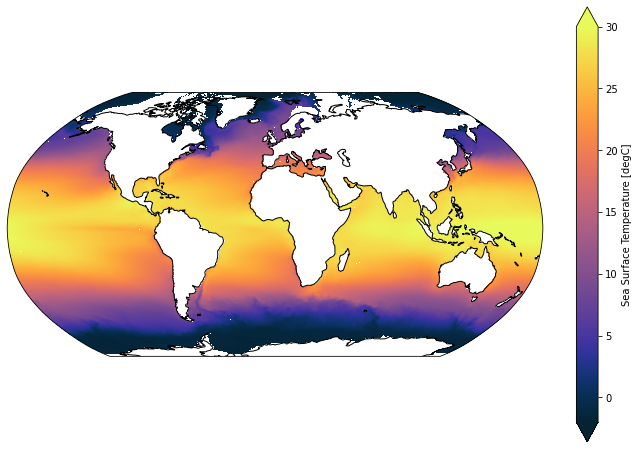

In [82]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

SST_mom6_time_mean.plot(ax=ax,
         x=SST_mom6_time_mean.cf['longitude'].name, y=SST_mom6_time_mean.cf['latitude'].name, 
         transform=ccrs.PlateCarree(),
         vmin=-2, vmax=30, extend='both',
         cmap=cm.cm.thermal)

ax.coastlines();